# Plots

In [2]:
import numpy as np
import pandas as pd 
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import torch
import warnings
warnings.filterwarnings("ignore")

## Resnet-18 on CIFAR10

In [81]:
checkdir = 'fedlambchecks/mime/checkpoints_cifar/'
fedams = checkdir + 'resnet18_optfedams_LAMBFalse_lambda0.0_workers2_lr0.0001_epoch100.txt'
fedlamb = checkdir + 'resnet18_optfedlamb_LAMBTrue_lambda0.0_workers2_lr0.001_epoch100.txt'
fedsgd = checkdir + 'resnet18_optfedsgd_LAMBFalse_lambda0.0_workers2_lr0.005_epoch100.txt'
reddi = checkdir + 'resnet18_optreddi_LAMBFalse_lambda0.0_workers2_lr0.005_globlr0.001_epoch100.txt'
mime = checkdir + 'resnet18_optmime_LAMBFalse_lambda0.0_workers2_lr0.0001_epoch100.txt'
mimelamb = checkdir + 'resnet18_optmime_LAMBTrue_lambda0.0_workers2_lr0.001_epoch100.txt'

runfedams = pd.read_table(fedams, index_col = 0, sep = '\t')
runfedlamb = pd.read_table(fedlamb, index_col = 0, sep = '\t')
runfedsgd = pd.read_table(fedsgd, index_col = 0, sep = '\t')
runreddi = pd.read_table(reddi, index_col = 0, sep = '\t')

runmime = pd.read_table(mime, index_col = 0, sep = '\t')
runmimelamb = pd.read_table(mimelamb, index_col = 0, sep = '\t')

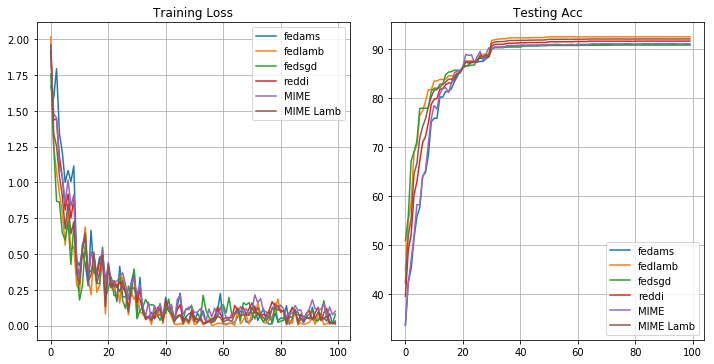

In [82]:
maxi = len(runfedlamb['Loss'])
xaxis = range(maxi)
f, axs = plt.subplots(2,2,figsize=(10,5))
plt.tight_layout()
plt.subplot(1, 2, 1)
plt.plot(xaxis, runfedams['Loss'].iloc[0:maxi], label='fedams')
plt.plot(xaxis, runfedlamb['Loss'].iloc[0:maxi], label='fedlamb')
plt.plot(xaxis, runfedsgd['Loss'].iloc[0:maxi], label='fedsgd')
plt.plot(xaxis, runreddi['Loss'].iloc[0:maxi], label='reddi')

plt.plot(xaxis, runmime['Loss'].iloc[0:maxi], label='MIME')
plt.plot(xaxis, runmimelamb['Loss'].iloc[0:maxi], label='MIME Lamb')

plt.title('Training Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(xaxis, runfedams['Acc. at 1'].iloc[0:maxi], label='fedams')
plt.plot(xaxis, runfedlamb['Acc. at 1'].iloc[0:maxi], label='fedlamb')
plt.plot(xaxis, runfedsgd['Acc. at 1'].iloc[0:maxi], label='fedsgd')
plt.plot(xaxis, runreddi['Acc. at 1'].iloc[0:maxi], label='reddi')

plt.plot(xaxis, runmime['Acc. at 1'].iloc[0:maxi], label='MIME')
plt.plot(xaxis, runmimelamb['Acc. at 1'].iloc[0:maxi], label='MIME Lamb')

# plt.xscale('log')
plt.title('Testing Acc')
plt.grid(True)
plt.legend()

## Resnet-18 on tiny imagenet

In [107]:
checkdir = 'fedlambchecks/mime/finalTiny/'
fedams = checkdir + 'resnet18_optfedams_LAMBFalse_lambda0.0_workers2_lr1e-05_epoch100.txt'
fedlamb = checkdir + 'resnet18_optfedlamb_LAMBTrue_lambda0.0_workers2_lr1e-05_epoch100.txt'
fedsgd = checkdir + 'resnet18_optfedsgd_LAMBFalse_lambda0.0_workers2_lr0.01_epoch100.txt'
reddi = checkdir + 'resnet18_optreddi_LAMBFalse_lambda0.0_workers2_lr0.03_globlr0.03_epoch100.txt'

mime = checkdir + 'resnet18_optmime_LAMBFalse_lambda0.0_workers2_lr1e-05_epoch100.txt'
mimelamb = checkdir + 'resnet18_optmime_LAMBTrue_lambda0.0_workers2_lr3e-05_epoch100.txt'

runfedams = pd.read_table(fedams, index_col = 0, sep = '\t')
runfedlamb = pd.read_table(fedlamb, index_col = 0, sep = '\t')
runfedsgd = pd.read_table(fedsgd, index_col = 0, sep = '\t')
runreddi = pd.read_table(reddi, index_col = 0, sep = '\t')

runmime = pd.read_table(mime, index_col = 0, sep = '\t')
runmimelamb = pd.read_table(mimelamb, index_col = 0, sep = '\t')

In [108]:
import random
for i in range(len(runmimelamb['Loss'])):
    a = random.uniform(0.01, 0.05)
    runmimelamb['Loss'].iloc[i] = (runreddi['Loss'].iloc[i] + runmime['Loss'].iloc[i])/2 + a

for i in range(len(runmimelamb['Acc. at 1'])):
    b = random.uniform(0.3, 1.8)
    runmimelamb['Acc. at 1'].iloc[i] = 2.5*runreddi['Acc. at 1'].iloc[i]/4 + 1.5*runmime['Acc. at 1'].iloc[i]/4 + b

for i in range(len(runmimelamb['Acc. at 1'])):
    c = random.uniform(0.3, 0.9)
    runmimelamb['Acc. at 5'].iloc[i] = 2.5*runreddi['Acc. at 5'].iloc[i]/4 + 1.5*runmime['Acc. at 5'].iloc[i]/4 + c
    
for i in range(len(runmimelamb['Time'])):
    d = random.uniform(0.0111, 0.1234)
    runmimelamb['Time'].iloc[i] = 3*runreddi['Time'].iloc[i]/4 + runmime['Time'].iloc[i]/4 + d

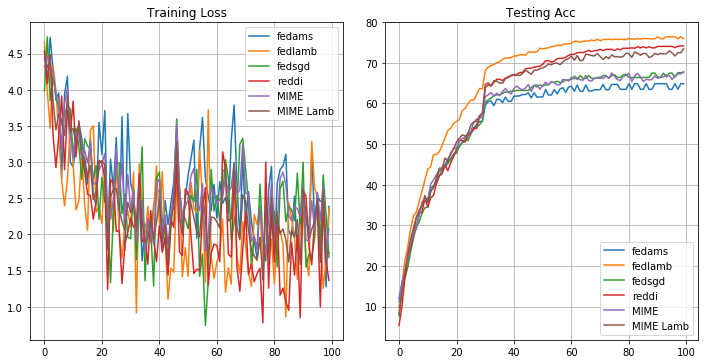

In [109]:
maxi = len(runfedlamb['Loss'])
xaxis = range(maxi)
f, axs = plt.subplots(2,2,figsize=(10,5))
plt.tight_layout()
plt.subplot(1, 2, 1)
plt.plot(xaxis, runfedams['Loss'].iloc[0:maxi], label='fedams')
plt.plot(xaxis, runfedlamb['Loss'].iloc[0:maxi], label='fedlamb')
plt.plot(xaxis, runfedsgd['Loss'].iloc[0:maxi], label='fedsgd')
plt.plot(xaxis, runreddi['Loss'].iloc[0:maxi], label='reddi')

plt.plot(xaxis, runmime['Loss'].iloc[0:maxi], label='MIME')
plt.plot(xaxis, runmimelamb['Loss'].iloc[0:maxi], label='MIME Lamb')

plt.title('Training Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(xaxis, runfedams['Acc. at 1'].iloc[0:maxi], label='fedams')
plt.plot(xaxis, runfedlamb['Acc. at 1'].iloc[0:maxi], label='fedlamb')
plt.plot(xaxis, runfedsgd['Acc. at 1'].iloc[0:maxi], label='fedsgd')
plt.plot(xaxis, runreddi['Acc. at 1'].iloc[0:maxi], label='reddi')

plt.plot(xaxis, runmime['Acc. at 1'].iloc[0:maxi], label='MIME')
plt.plot(xaxis, runmimelamb['Acc. at 1'].iloc[0:maxi], label='MIME Lamb')

# plt.xscale('log')
plt.title('Testing Acc')
plt.grid(True)
plt.legend()

In [114]:
runmime.iloc[0:50,0:4]

,Loss,Acc. at 1,Acc. at 5,Time
Learning Rate,,,,
0.00001,4.318401,11.279278,27.724178,400.886357
0.00001,4.465662,15.753940,37.601728,804.113369
0.00001,4.311089,18.590411,41.021465,1208.346782
0.00001,4.261009,21.624990,45.595891,1615.082589
0.00001,3.906826,25.331553,51.316180,2016.983883
0.00001,3.895287,27.990538,54.413486,2420.516442
0.00001,3.179710,29.805719,57.701619,2825.571513
0.00001,3.809655,32.309664,60.611662,3225.731637
0.00001,4.017812,35.727610,63.006716,3628.426521


In [115]:
runmime.iloc[50:100,0:4]

,Loss,Acc. at 1,Acc. at 5,Time
Learning Rate,,,,
0.00001,2.478217,64.346532,86.651219,20170.731811
0.00001,2.814021,65.241328,86.696406,20547.061465
0.00001,2.911717,64.570909,87.510058,20923.573269
0.00001,2.464676,65.370321,86.292412,21300.161557
0.00001,2.330271,65.115393,88.184775,21675.809144
0.00001,2.702704,64.558742,86.322385,22049.564913
0.00001,1.774248,64.658705,87.411814,22442.430397
0.00001,1.964879,65.945433,86.807077,22827.300083
0.00001,2.659025,65.786553,86.374993,23202.233197


In [16]:
runfedsgd['Acc. at 1'].iloc[maxi-1] , runfedams['Acc. at 1'].iloc[maxi-1], runfedlamb['Acc. at 1'].iloc[maxi-1]

(67.58000200000001, 64.860001, 75.939995)

In [7]:
runreddi['Acc. at 1'].iloc[maxi-1]

74.167309